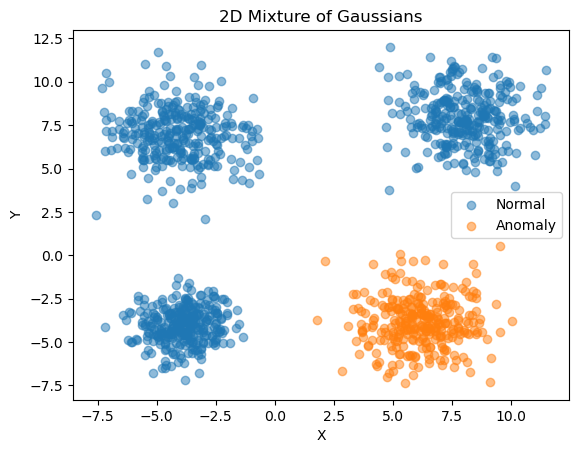

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of samples to generate
num_samples = 300

# Define the mean and covariance of the four gaussians
mean1 = [-4, -4]
cov1 = [[1, 0], [0, 1]]

mean2 = [8, 8]
cov2 = [[2, 0], [0, 2]]

mean3 = [-4, 7]
cov3 = [[2, 0], [0, 2]]

mean4 = [6, -4]
cov4 = [[2, 0], [0, 2]]

# Generate the samples
samples1 = np.random.multivariate_normal(mean1, cov1, num_samples)
samples2 = np.random.multivariate_normal(mean2, cov2, num_samples)
samples3 = np.random.multivariate_normal(mean3, cov3, num_samples)
samples4 = np.random.multivariate_normal(mean4, cov4, num_samples)

# Create labels for the samples
labels1 = np.zeros((num_samples, 1)) # label 0 for samples1
labels2 = np.zeros((num_samples, 1)) # label 0 for samples2
labels3 = np.zeros((num_samples, 1)) # label 0 for samples3
labels4 = np.ones((num_samples, 1))  # label 1 for samples4

# Concatenate the samples to create the dataset
dataset = np.concatenate((samples1, samples2, samples3, samples4), axis=0)

# Concatenate the labels
labels = np.concatenate((labels1, labels2, labels3, labels4), axis=0)

# Plot the dataset with different colors for different labels
mask = labels.flatten() == 0
plt.scatter(dataset[:, 0][mask], dataset[:, 1][mask], alpha=0.5, label='Normal')
plt.scatter(dataset[:, 0][~mask], dataset[:, 1][~mask], alpha=0.5, label='Anomaly')
plt.title('2D Mixture of Gaussians')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



In [2]:
dataset[0]

array([-3.77140061, -4.96582337])

In [23]:
2*torch.eye(2)

tensor([[2., 0.],
        [0., 2.]])

In [34]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.distributions.multivariate_normal import MultivariateNormal

# Define the number of samples to generate
num_samples = 300

# Define the mean and covariance of the four gaussians
mean1 = torch.tensor([-4., -4.])
cov1 = torch.eye(2)

mean2 = torch.tensor([8., 8.])
cov2 = 2*torch.eye(2)

mean3 = torch.tensor([-4., 7.])
cov3 = 2*torch.eye(2)

mean4 = torch.tensor([6., -4.])
cov4 = 2*torch.eye(2)

# Generate the samples
dist1 = MultivariateNormal(mean1, cov1)
samples1 = dist1.sample([num_samples])

dist2 = MultivariateNormal(mean2, cov2)
samples2 = dist2.sample([num_samples])

dist3 = MultivariateNormal(mean3, cov3)
samples3 = dist3.sample([num_samples])

dist4 = MultivariateNormal(mean4, cov4)
samples4 = dist4.sample([num_samples])

# Create labels for the samples
labels1 = torch.zeros((num_samples, 1)) # label 0 for samples1
labels2 = torch.zeros((num_samples, 1)) # label 0 for samples2
labels3 = torch.zeros((num_samples, 1)) # label 0 for samples3
labels4 = torch.ones((num_samples, 1))  # label 1 for samples4

# Concatenate the samples to create the dataset
dataset = torch.cat((samples1, samples2, samples3, samples4), dim=0)

# Concatenate the labels
labels = torch.cat((labels1, labels2, labels3, labels4), dim=0)

# Create a TensorDataset and DataLoader
tensor_dataset = TensorDataset(dataset, labels)
dataloader = DataLoader(tensor_dataset, batch_size=32, shuffle=True)


In [37]:
dataset.shape

torch.Size([1200, 2])

In [30]:
# transform the dataset to numpy
dataset = dataset.numpy()
dataset

array([[-5.193703 , -4.3118443],
       [-1.4918869, -4.8021693],
       [-5.5212984, -6.288413 ],
       ...,
       [ 4.5038137, -3.8268788],
       [ 6.6570373, -5.65975  ],
       [ 6.93779  , -4.8341184]], dtype=float32)

In [32]:
# extract data from dataloader
for data in dataloader:
		inputs, labels = data
		# print size of input and labels
		print(inputs.size(), labels.size())
		break

torch.Size([32, 2]) torch.Size([32, 1])


In [36]:
# extract all data from dataloader at once
inputs, labels = next(iter(dataloader))
print(inputs.size(), labels.size())



torch.Size([32, 2]) torch.Size([32, 1])


In [38]:
# Initialize lists to store inputs and targets
inputs = []
targets = []

# Iterate over the DataLoader
for batch_inputs, batch_targets in dataloader:
		inputs.append(batch_inputs)
		targets.append(batch_targets)

In [43]:
# Convert the lists to numpy arrays
inputs = torch.cat(inputs, dim=0).numpy()


In [44]:
inputs.shape

(1200, 2)